<a href="https://colab.research.google.com/github/Abhinand0-0/pdecode/blob/main/Experiment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Experiment 5: The Laplace Transform and Frequency Response

 The Laplace Transform is a powerful mathematical tool used extensively in circuit analysis, control systems, and signal processing. It transforms a function from the time domain,$f(t)$
, into the frequency domain, $F(s)$
.

While this is useful for solving differential equations, its true power in engineering comes from analyzing the frequency response. By setting the complex variable $s = j\omega$
 (where $j$
 is the imaginary unit and $\omega$
 is angular frequency), we can see how a system or signal behaves at different frequencies. This is analyzed through two key plots: the Magnitude Plot and the Phase Plot.

### Aim
To compute the Laplace transform of given functions and, most importantly, to visualize and interpret their frequency response through magnitude and phase plots.

###Objectives
- To use Python’s SymPy library for symbolic Laplace transforms.
- To understand how to obtain the frequency response function $F(j\omega)$
 from the Laplace transform $F(s)$
.
- To generate and interpret magnitude and phase plots.
- To connect these plots to physical concepts like amplification, attenuation, and time delay (phase shift).

### Algorithm
1. Define Symbols: Use sp.symbols() to declare symbolic variables t (time), s (Laplace variable), and w (frequency,$\omega$
).
2. Define the Function: Specify the time-domain function $f(t)$
 as a symbolic expression.
3. Compute Laplace Transform: Use sp.laplace_transform() to find the corresponding F(S)
.
4. Derive Frequency Response: Substitute $s = j\omega$
 into the symbolic expression for F(S)
 to get the frequency response function $F(j\omega)$
.
5. Prepare for Plotting: Convert the symbolic expressions for **f(T)**
 and $F(j\omega)$
 into fast numerical functions using sp.lambdify().
6. Generate Data:
- Create a numerical array of time points t_values.
- Create a logarithmic array of frequency points w_values using np.logspace().
- Calculate the complex values of $F(j\omega)$
 for the frequency range.
7. Calculate Magnitude and Phase:
Magnitude: np.abs(F_jw_values)
Phase: np.angle(F_jw_values, deg=True) (in degrees for easier interpretation)
8. Plot: Create three subplots: the time-domain signal, the magnitude plot (log-log scale), and the phase plot (log-x scale). This set of frequency plots is known as a Bode Plot.

## Laplace transform of basic functions using `Sympy`.
1. Find the Laplace transform of the following:

(i). $\sin(at)$.

(ii). $\cos(at)$.

(iii). $\cosh(at)$

(iv). $e^{-at}\left(\sin 2t- \cos t\right)$

>Find $\mathcal{L}(\sin (at))$

>*Step 1:* Importing libraries

In [1]:
[] ##importing libraries
import sympy as sp
from IPython.display import display, Math

>*Step 2:* Creating symbolic variables and define function

In [2]:
[] # ---1. Define symbols ---
t,s,a,b=sp.symbols('t s a b', real=True,positive=True)
# --- 2.Define the function ---
f=sp.sin(a*t)

>*Step 3:* Evaluating the Laplace transform

In [3]:
# ---3.Compute Laplace Transform ---
F_s = sp.laplace_transform(f,t,s,noconds=True)

>*Step 4:* Display the output in symbolic mode

In [4]:
# ---4. Print the symbolic results ---
print("Given function:")
display(Math('f(t)='+sp.latex(f)))
print("\nLaplace transform:")
display(Math('\\bar{f}(s)='+sp.latex(F_s)))


Given function:


<IPython.core.display.Math object>


Laplace transform:


<IPython.core.display.Math object>

>Find $\mathcal{L}(\cos at)$


In [5]:
[65] #---2.Define the functin ---
f=sp.cos(a*t)
# ---3.Compute Laplace Transform ---
F_s = sp.laplace_transform(f,t,s,noconds=True)


In [6]:
# ---4. Print the symbolic results ---
print("Given function:")
display(Math('f(t)='+sp.latex(f)))
print("\nLaplace transform:")
display(Math('\\bar{f}(s)='+sp.latex(F_s)))


Given function:


<IPython.core.display.Math object>


Laplace transform:


<IPython.core.display.Math object>

>Find $\mathcal{L}(\cosh( ah))$


In [32]:
[65] #---2.Define the functin ---
f=sp.cosh(a*t)
# ---3.Compute Laplace Transform ---
F_s = sp.laplace_transform(f,t,s,noconds=True)


In [33]:
# ---4. Print the symbolic results ---
print("Given function:")
display(Math('f(t)='+sp.latex(f)))
print("\nLaplace transform:")
display(Math('\\bar{f}(s)='+sp.latex(F_s)))


Given function:


<IPython.core.display.Math object>


Laplace transform:


<IPython.core.display.Math object>

>Find $\mathcal{L}(e^{-at}\left(\sin 2t- \cos t\right)$


In [35]:
# --- 2. Define the function ---
f = sp.exp(-a*t)*(sp.sin(2*t) - sp.cos(t))
# --- 3.Compute Laplace Transform
F_s = sp.laplace_transform(f, t, s, noconds=True)

In [36]:
# ---4. Print the symbolic results ---
print("Given function:")
display(Math('f(t)='+sp.latex(f)))
print("\nLaplace transform:")
display(Math('\\bar{f}(s)='+sp.latex(F_s)))


Given function:


<IPython.core.display.Math object>


Laplace transform:


<IPython.core.display.Math object>

##Case Study: An RC Low-Pass Filter’s Impulse Response
`Problem`: The voltage response of a simple RC low-pass filter to a sharp input (an impulse) is an exponential decay function, $f(t) = e^{-at}$
, where $a = 1/RC$
. Let’s analyze this signal for $a=1$
.

`Physical Interpretation: * Magnitude |F(jω)|`: Tells us how much the filter will pass or block a sine wave of frequency $\omega$
.
 `* Phase` arg(F(jω)): Tells us how much the filter will delay a sine wave of frequency $\omega$
.

Function: f(t) = exp(-t)
Laplace Transform: F(s) = 1/(s + 1)
Frequency Response: F(jω) = 1/(1.0*I*w + 1)


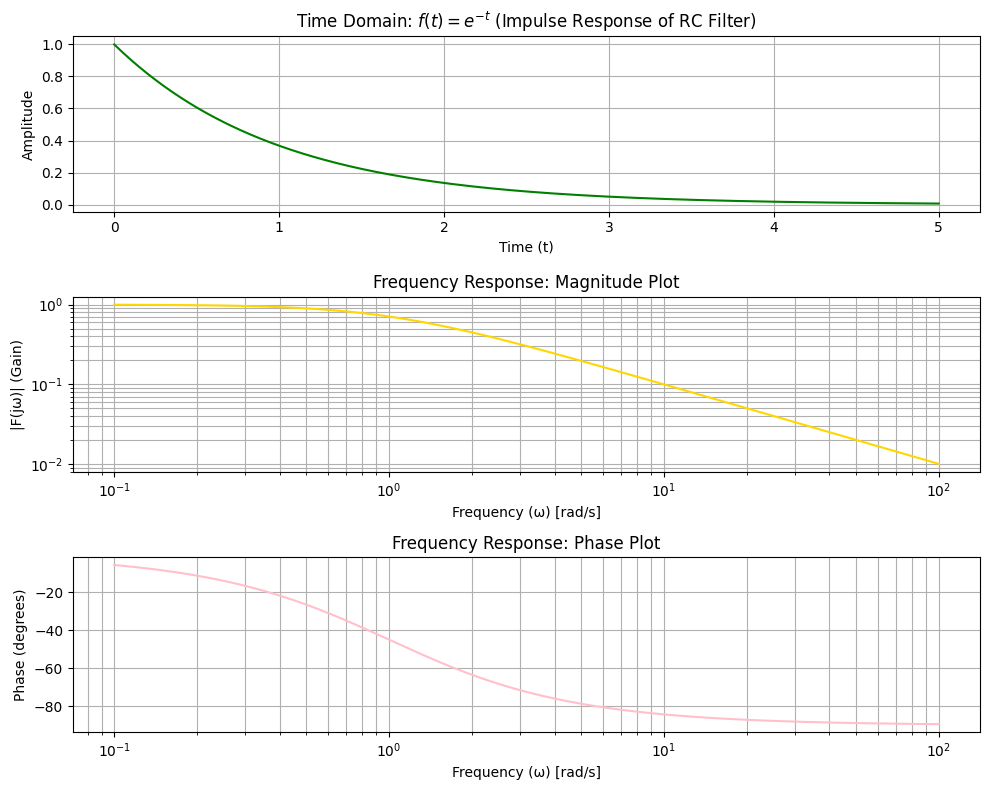

In [17]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define symbols ---
t, s, w = sp.symbols('t s w', real=True, positive=True)
a = sp.Symbol('a', real=True, positive=True)

# --- 2. Define the function ---
f = sp.exp(-a*t)

# --- 3. Compute Laplace Transform ---
F_s = sp.laplace_transform(f, t, s, noconds=True)

# --- Set parameter for our specific case ---
f_case = f.subs(a, 1)
F_s_case = F_s.subs(a, 1)

# --- 4. Derive Frequency Response ---
F_jw = F_s_case.subs(s, 1j * w)

# --- Print the symbolic results ---
print(f"Function: f(t) = {f_case}")
print(f"Laplace Transform: F(s) = {F_s_case}")
print(f"Frequency Response: F(jω) = {F_jw}")

# --- 5. Lambdify for numerical evaluation ---
f_func = sp.lambdify(t, f_case, 'numpy')
F_jw_func = sp.lambdify(w, F_jw, 'numpy')

# --- 6. & 7. Generate Data and Calculate Mag/Phase ---
t_values = np.linspace(0, 5, 400)
f_values = f_func(t_values)

w_values = np.logspace(-1, 2, 400) # From 0.1 to 100 rad/s
F_jw_values = F_jw_func(w_values)

magnitude = np.abs(F_jw_values)
phase = np.angle(F_jw_values, deg=True)

# --- 8. Plotting ---
plt.figure(figsize=(10, 8))

# Plot f(t)
plt.subplot(3, 1, 1)
plt.plot(t_values, f_values, color='green')
plt.title('Time Domain: $f(t) = e^{-t}$ (Impulse Response of RC Filter)')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot Magnitude |F(jω)|
plt.subplot(3, 1, 2)
plt.loglog(w_values, magnitude, color='gold')
plt.title('Frequency Response: Magnitude Plot')
plt.xlabel('Frequency (ω) [rad/s]')
plt.ylabel('|F(jω)| (Gain)')
plt.grid(True, which="both", ls="-")

# Plot Phase arg(F(jω))
plt.subplot(3, 1, 3)
plt.semilogx(w_values, phase, color='pink')
plt.title('Frequency Response: Phase Plot')
plt.xlabel('Frequency (ω) [rad/s]')
plt.ylabel('Phase (degrees)')
plt.grid(True, which="both", ls="-")

plt.tight_layout()
plt.show()

##Results and Discussion
- Time Domain: The function $e^{-t}$
 shows a sharp start at 1, followed by a slow decay.

- Magnitude Plot: This plot clearly shows the behavior of a low-pass filter. At low frequencies (e.g., $\omega<1$
), the magnitude (gain) is close to 1, meaning these signals are passed through without attenuation. As frequency increases, the magnitude rolls off, indicating that high-frequency signals are blocked. The “corner frequency” where the roll-off begins is at $\omega=1/a=1$
 rad/s.

- Phase Plot: At very low frequencies, the phase shift is near 0 degrees. As the frequency approaches the corner frequency, the phase lag increases, reaching -45 degrees at $\omega=1$
 rad/s. At very high frequencies, the phase shift approaches -90 degrees, meaning a high-frequency sine wave passing through this filter will be delayed by a quarter of its cycle. This delay is a fundamental property of physical systems like filters.